In [47]:
import pandas as pd
import numpy as np

In [44]:
# data imports
# wish there was an easier way to import
holiday_events_df = pd.read_csv('data\holidays_events.csv')
oil_df =  pd.read_csv('data\oil.csv')
sample_submission_df = pd.read_csv('data\sample_submission.csv')
stores_df = pd.read_csv('data\stores.csv')
test_df = pd.read_csv('data/test.csv')
# train_df = pd.read_csv('data/train.csv',
#                        index_col = 'date',
#                        parse_dates=['date']) # make the date the index
train_df = pd.read_csv('data/train.csv',
                        index_col='date',
                       parse_dates=['date']) # make the date the index
train_df = pd.read_csv('data/train.csv')
transactions_df = pd.read_csv('data/transactions.csv')

# TODO: see kaggle course again for to_period

# IID White Noise

In [53]:
# Types of TS Noise Processes 

ts_iid_noise = np.random.random(size=100)
ts_iid_noise

iid_noise_df = pd.DataFrame(ts_iid_noise,index=np.arange(len(ts_iid_noise)))
iid_noise_df

,0
0,0.625407
1,0.365355
2,0.417081
3,0.890825
4,0.967569
...,...
95,0.818787
96,0.745217
97,0.011579
98,0.889544


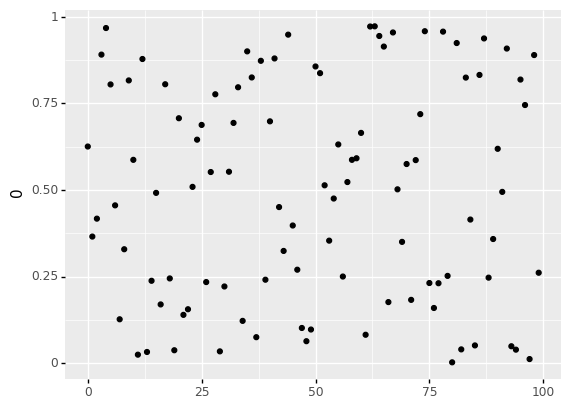

<ggplot: (198508225242)>

In [58]:
(
    ggplot(iid_noise_df) + aes(x=iid_noise_df.index,y=iid_noise_df[0])
    + geom_point()
)

In [46]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [36]:
# I will first attempt this with linear regression!
# we can follow the preprovided course for this....

# step 1 : visualize the data using plotnine
from plotnine import ggplot, aes,geom_point

In [37]:
# try creating a time step index for the training data
train_df['TimeStep'] = np.arange(len(train_df.index))

In [38]:
train_df_nonzero = train_df[train_df['sales'] > 0]

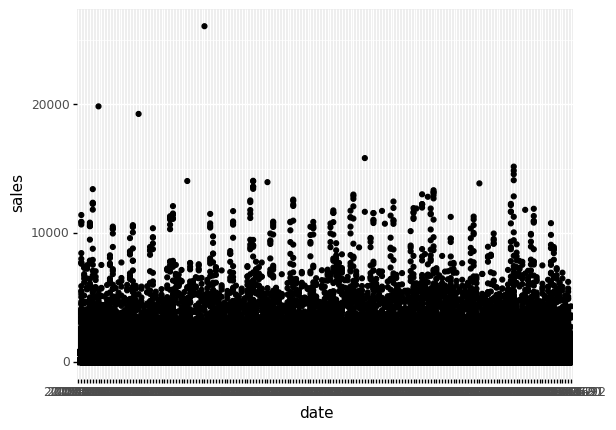

<ggplot: (198560707212)>

In [39]:
(
    ggplot(train_df_nonzero.head(150000)) + aes(x='date',y="sales")
    + geom_point()
)
# this looks like it has seasons!
# TODO: remove the seasonality aspect to get to the underlying pattern

# TODO: can look at it like a waveform?
# TODO: actually go through the course

In [42]:
# fix the date float issue
train_df.asfreq('D')
#???
train_df[['date','sales']]

,date,sales
0,2013-01-01,0.000
1,2013-01-01,0.000
2,2013-01-01,0.000
3,2013-01-01,0.000
4,2013-01-01,0.000
...,...,...
3000883,2017-08-15,438.133
3000884,2017-08-15,154.553
3000885,2017-08-15,2419.729
3000886,2017-08-15,121.000


In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_ts = seasonal_decompose(train_df[['date','sales']])

ValueError: could not convert string to float: '2013-01-01'

In [64]:
# ok maybe the different categories are just sold at different rates - let's try different categories
train_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

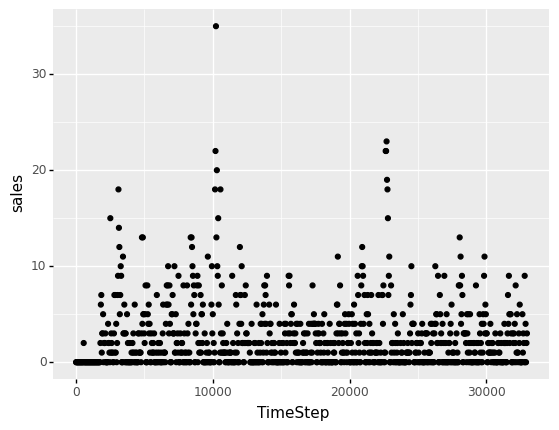

<ggplot: (142731234383)>

In [68]:
# beauty category sales
(
    ggplot(train_df[train_df['family'] == 'BEAUTY'].head(1000)) + aes(x='TimeStep',y="sales")
    + geom_point()
)
# ok there's actually some trend and seasnality here....


In [ ]:
# I don't suspect that the above will work, so I will try now with an Autoregressive process


In [ ]:
# implemente AR process

# step 1: the formula for the AR process is:
